# Lab Problem:

In class this week we learned about cosine similarity as a way of measuring
similarity in text documents. Today, we’re focused on the similarity of fictional presidents instead of real ones, but working through the lab will still be helpful as you get deeper into HW3.


The text files for this lab are speeches given by President Bartlet (from the West Wing) and President Shepard (from the American President), and we’re going
to see how similar they are,
using (1) visualization, and (2) cosine similarity.

Both characters are written by Aaron Sorkin, but the speeches are in totally
different contexts, 

so it’s kind of hard to predict what we’ll find.
You may use the code we did together in class to compute the cosine similarity
of two texts based on the dot product of two vectors.

Here’s the approach today:

• Read in each text file as a string.

• Visualize both Presidents’ speeches using the wordcloud library (also discussed in Tuesday’s lecture).

• Find the most common words used by each President. You might find it
convenient to use the Counter module to do this. Try creating vectors
using the unique words among the most frequent k words of each speech,
where k=10-20 words (your choice).


• Use the cosine similarity function provided in class to measure the
similarity of the two speeches. Is it what you expected? Would you have
guessed that these characters were written by the same person?

• As an optional enhancement, try cleaning up the text to remove small
words and punctuation. This might produce a more accurate result.

In [ ]:
# Install python packages
!pip install matplotlib pandas wordcloud

# Word cloud

In [2]:
# import python packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import math
import re
from collections import Counter

In [3]:
# Read txt file and store it as string

with open('bartlet.txt', 'r') as file:
    bartlet = file.read().replace('\n', '')

with open('shepard.txt', 'r') as file:
    shepard = file.read().replace('\n', '')

In [4]:
# Generate word cloud for bartlet

bartlet_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(bartlet)

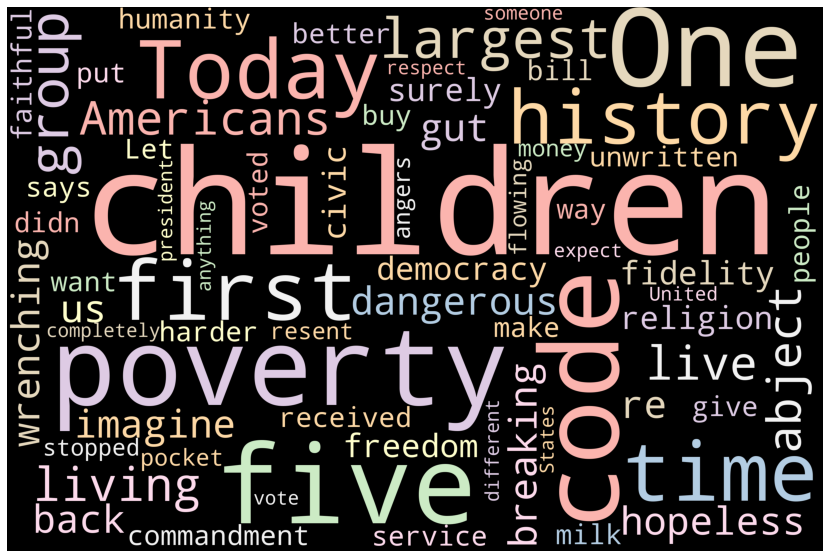

In [5]:
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.savefig("bartlet.png")
plt.imshow(bartlet_word_cloud)

In [6]:
shepard_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(shepard)

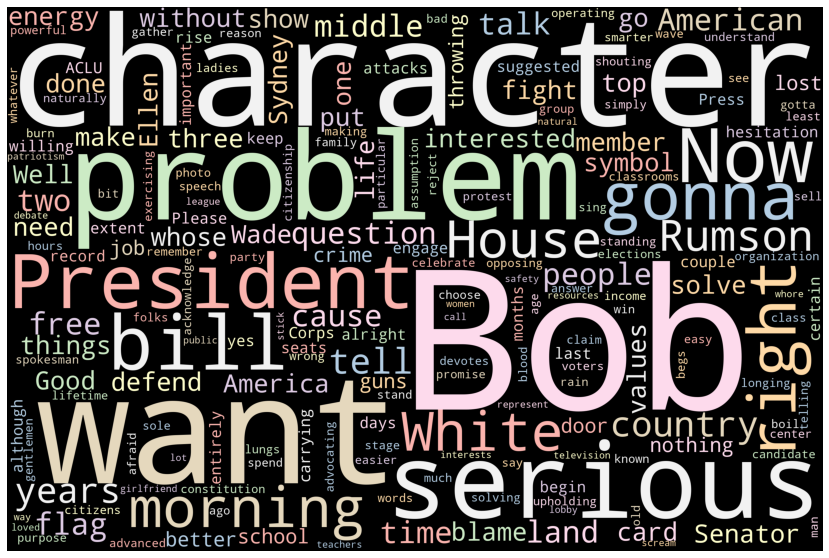

In [7]:
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.savefig("shepared.png")
plt.imshow(shepard_word_cloud)

# Cosine similarity

One of the technique to find similarity between two text documents is called Cosine similarity. 

Similar in terms of what? That's the main question when chooses to find the similarity? Based on word count on both documents or meaning of both documents?

If we took above two features ie word count and how similar to each other and place it on the x and y axis as a vector. 

The difference between two vectors forms an angle.

This angle will helps to identify how similar or different are the documents.

0-deg = same
90-deg = opposite to each other

Knowing the angle will tell you how similar the text documents are, but it's better to have placed the value between 0 to 1. that's where the cosine similarity coming into picture.

**compute cosine similarity of A to B: (A dot B)/{||A||*||B||)**

A & B are vector representation of two text document.

In [13]:
# Stop words
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Regular expression Get only words.
WORD = re.compile(r"\w+")

In [34]:
# Calculate cosine similarity
# It will take argument which is vector representation of both document.

def get_cosine(vec1, vec2):

    intersection = set(vec1.keys()) & set(vec2.keys())

    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])

    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [35]:
# Convert text into vector and removing stop words
def text_to_vector(text):
    words = WORD.findall(text) # applying regular expression and get only text data
    word_list = [] # Empty list to store data
    for word in words: 
        if word not in stop_words: # Check if the word is stop word or not
            word_list.append(word)
    
    return Counter(word_list) # Return counter object

In [36]:
# Convert text into vector without removing stop words
def text_to_vector_with_sw(text):
    words = WORD.findall(text)
    return Counter(words)

There are many ways available to convert text from vectors. Here used simple count Vectorizer which take unique words and fit them by giving index the go thorough the text document and update the count of unique words when present.

Stop words are set of word commonly used words in any language. If we remove the stop words, we can able to focus on the important words.

In [37]:
# By removing stop word
A = text_to_vector(bartlet) # convert text into vector
B = text_to_vector(shepard)
cosine = get_cosine(A, B)
print("Cosine Similarity:", cosine)

Cosine: 0.29208342861870995


In [39]:
print(A)

Counter({'children': 4, 'I': 4, 'poverty': 2, 'One': 2, 'five': 2, 'If': 2, 'code': 2, 'Today': 1, 'first': 1, 'time': 1, 'history': 1, 'largest': 1, 'group': 1, 'Americans': 1, 'living': 1, 'live': 1, 'abject': 1, 'dangerous': 1, 'hopeless': 1, 'back': 1, 'breaking': 1, 'gut': 1, 'wrenching': 1, 'us': 1, 'could': 1, 'imagine': 1, 'fidelity': 1, 'freedom': 1, 'democracy': 1, 'civic': 1, 'religion': 1, 'surely': 1, 'humanity': 1, 'faithful': 1, 'service': 1, 'unwritten': 1, 'commandment': 1, 'says': 1, 'shall': 1, 'give': 1, 'better': 1, 'received': 1, 'Let': 1, 'put': 1, 'way': 1, 'voted': 1, 'bill': 1, 'want': 1, 'make': 1, 'harder': 1, 'people': 1, 'buy': 1, 'milk': 1, 'stopped': 1, 'money': 1, 'flowing': 1, 'pocket': 1, 'angers': 1, 'resent': 1, 'completely': 1, 'respect': 1, 'But': 1, 'expect': 1, 'anything': 1, 'different': 1, 'president': 1, 'United': 1, 'States': 1, 'vote': 1, 'someone': 1, 'else': 1})


In [40]:
print(B)

Counter({'I': 24, 'Bob': 10, 'You': 8, 'character': 6, 'And': 6, 'want': 6, 'serious': 5, 'It': 4, 'President': 4, 'gonna': 4, 'morning': 3, 'White': 3, 'House': 3, 'Rumson': 3, 'country': 3, 'years': 3, 'tell': 3, 'question': 3, 'Now': 3, 'cause': 3, 'free': 3, 'land': 3, 'flag': 3, 'right': 3, 'time': 3, 'get': 3, 'problem': 3, 'people': 3, 'two': 3, 'middle': 3, 'talk': 3, 'bill': 3, 'Good': 2, 'For': 2, 'three': 2, 'without': 2, 'card': 2, 'whose': 2, 'defend': 2, 'would': 2, 'America': 2, 'put': 2, 'fight': 2, 'top': 2, 'Then': 2, 'symbol': 2, 'cannot': 2, 'The': 2, 'one': 2, 'show': 2, 'energy': 2, 'Well': 2, 'We': 2, 'problems': 2, 'solve': 2, 'need': 2, 'interested': 2, 'things': 2, 'blame': 2, 'American': 2, 'values': 2, 'life': 2, 'go': 2, 'Sydney': 2, 'Ellen': 2, 'Wade': 2, 'done': 2, 'nothing': 2, 'school': 2, 'better': 2, 'lost': 2, 'job': 2, 'crime': 2, 'throwing': 2, 'guns': 2, 'door': 2, 'Members': 1, 'Press': 1, 'Corps': 1, 'begin': 1, 'rise': 1, 'alright': 1, 'Please'

In [38]:
# Without removing stop word
vector1 = text_to_vector_with_sw(bartlet)
vector2 = text_to_vector_with_sw(shepard)
cosine_sw = get_cosine(vector1, vector2)
print("Cosine Similarity:", cosine_sw)

Cosine: 0.633997237817908


In [41]:
print(vector1)

Counter({'the': 8, 'in': 5, 'of': 5, 'children': 4, 'to': 4, 'that': 4, 'I': 4, 'you': 4, 'for': 3, 'our': 3, 'poverty': 2, 'One': 2, 'five': 2, 'and': 2, 'If': 2, 'is': 2, 'code': 2, 'we': 2, 'me': 2, 'it': 2, 'from': 2, 'if': 2, 'Today': 1, 'first': 1, 'time': 1, 'history': 1, 'largest': 1, 'group': 1, 'Americans': 1, 'living': 1, 'are': 1, 'live': 1, 'most': 1, 'abject': 1, 'dangerous': 1, 'hopeless': 1, 'back': 1, 'breaking': 1, 'gut': 1, 'wrenching': 1, 'any': 1, 'us': 1, 'could': 1, 'imagine': 1, 'they': 1, 're': 1, 'fidelity': 1, 'freedom': 1, 'democracy': 1, 'civic': 1, 'religion': 1, 'then': 1, 'surely': 1, 'humanity': 1, 'faithful': 1, 'service': 1, 'unwritten': 1, 'commandment': 1, 'says': 1, 'shall': 1, 'give': 1, 'better': 1, 'than': 1, 'ourselves': 1, 'received': 1, 'Let': 1, 'put': 1, 'this': 1, 'way': 1, 'voted': 1, 'against': 1, 'bill': 1, 'because': 1, 'didn': 1, 't': 1, 'want': 1, 'make': 1, 'harder': 1, 'people': 1, 'buy': 1, 'milk': 1, 'stopped': 1, 'some': 1, 'mon

In [42]:
print(vector2)

Counter({'the': 31, 'and': 27, 'of': 24, 'to': 24, 'I': 24, 'you': 20, 'a': 19, 'that': 14, 'is': 14, 'it': 13, 's': 12, 'Bob': 10, 'in': 8, 'You': 8, 'your': 7, 'about': 7, 't': 7, 'for': 7, 'character': 6, 'And': 6, 've': 6, 'want': 6, 'me': 5, 'serious': 5, 'm': 5, 'It': 4, 'has': 4, 'President': 4, 'this': 4, 'was': 4, 'his': 4, 'can': 4, 'an': 4, 'gonna': 4, 'up': 4, 'at': 4, 'them': 4, 'morning': 3, 'White': 3, 'House': 3, 'Rumson': 3, 'country': 3, 'been': 3, 'have': 3, 'years': 3, 'tell': 3, 'but': 3, 'question': 3, 'Now': 3, 'so': 3, 'if': 3, 'cause': 3, 'free': 3, 'who': 3, 'land': 3, 'flag': 3, 'right': 3, 'time': 3, 'he': 3, 'get': 3, 'problem': 3, 'people': 3, 'two': 3, 'middle': 3, 'with': 3, 'talk': 3, 'out': 3, 'my': 3, 'bill': 3, 'Good': 2, 'For': 2, 'not': 2, 'on': 2, 'three': 2, 'without': 2, 'am': 2, 'card': 2, 'more': 2, 'whose': 2, 'defend': 2, 'would': 2, 'most': 2, 'than': 2, 'didn': 2, 'America': 2, 'isn': 2, 'put': 2, 'fight': 2, 'top': 2, 'Then': 2, 'symbol':

* Around 30% similarity when removed the stop words from the document.
* Around 63% similarity between documents when used as it is.

# Most common words used by each President

In [44]:
# By removing stop word
barlet_words = text_to_vector(bartlet)

In [46]:
# We are saving result into counter object so we can use most_common to retrive K words
barlet_words.most_common(10)

[('children', 4),
 ('I', 4),
 ('poverty', 2),
 ('One', 2),
 ('five', 2),
 ('If', 2),
 ('code', 2),
 ('Today', 1),
 ('first', 1),
 ('time', 1)]

In [47]:
# By removing stop word
shepard_words = text_to_vector(shepard)

In [49]:
shepard_words.most_common(10)

[('I', 24),
 ('Bob', 10),
 ('You', 8),
 ('character', 6),
 ('And', 6),
 ('want', 6),
 ('serious', 5),
 ('It', 4),
 ('President', 4),
 ('gonna', 4)]

In [51]:
# With stop word
barlet_words_wsw = text_to_vector_with_sw(bartlet)
barlet_words_wsw.most_common(20)

[('the', 8),
 ('in', 5),
 ('of', 5),
 ('children', 4),
 ('to', 4),
 ('that', 4),
 ('I', 4),
 ('you', 4),
 ('for', 3),
 ('our', 3),
 ('poverty', 2),
 ('One', 2),
 ('five', 2),
 ('and', 2),
 ('If', 2),
 ('is', 2),
 ('code', 2),
 ('we', 2),
 ('me', 2),
 ('it', 2)]

In [52]:
# With stop word
shepard_words_wsw = text_to_vector_with_sw(shepard)
shepard_words_wsw.most_common(20)

[('the', 31),
 ('and', 27),
 ('of', 24),
 ('to', 24),
 ('I', 24),
 ('you', 20),
 ('a', 19),
 ('that', 14),
 ('is', 14),
 ('it', 13),
 ('s', 12),
 ('Bob', 10),
 ('in', 8),
 ('You', 8),
 ('your', 7),
 ('about', 7),
 ('t', 7),
 ('for', 7),
 ('character', 6),
 ('And', 6)]